In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
trans_data = pd.read_excel('data/QVI_transaction_data.xlsx')


In [4]:
trans= trans_data
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
cust = pd.read_csv('data/QVI_purchase_behaviour.csv')
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [8]:
# max product quantity is 200. investigate it
trans[trans['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [9]:
# order made by same customer. check other ordres of the same customer
trans[trans['LYLTY_CARD_NBR'] == 226000]	

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


customer made only two large qty purchases. Remove it from trans_data 

In [10]:
trans= trans[trans['LYLTY_CARD_NBR'] != 226000]

In [11]:
trans['PROD_NAME'].head(50)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
20           Smiths Crinkle      Original 330g
21      NCC S

In [12]:
trans['weight'] = trans['PROD_NAME'].str[-4:]
trans['weight']

C:\Users\Asus\AppData\Local\Temp\ipykernel_6288\735108977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['weight'] = trans['PROD_NAME'].str[-4:]


0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: weight, Length: 264834, dtype: object

In [13]:
trans['weight'].value_counts()

weight
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64

replace Salt with 135g and 210G with 210g and so on

In [14]:
trans['weight'] = trans['weight'].replace({'Salt':'135g', '210G':'210g', '150G':'150g', '175G':'175g'})

C:\Users\Asus\AppData\Local\Temp\ipykernel_6288\3503419095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['weight'] = trans['weight'].replace({'Salt':'135g', '210G':'210g', '150G':'150g', '175G':'175g'})


In [15]:
trans['PROD_NAME'].str.split(' ').head(20)

0     [Natural, Chip, , , , , , , , Compny, SeaSalt1...
1                      [CCs, Nacho, Cheese, , , , 175g]
2        [Smiths, Crinkle, Cut, , Chips, Chicken, 170g]
3         [Smiths, Chip, Thinly, , S/Cream&Onion, 175g]
4        [Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]
5     [Old, El, Paso, Salsa, , , Dip, Tomato, Mild, ...
6      [Smiths, Crinkle, Chips, Salt, &, Vinegar, 330g]
7     [Grain, Waves, , , , , , , , , Sweet, Chilli, ...
8        [Doritos, Corn, Chip, Mexican, Jalapeno, 150g]
9        [Grain, Waves, Sour, , , , Cream&Chives, 210G]
10     [Smiths, Crinkle, Chips, Salt, &, Vinegar, 330g]
11        [Kettle, Sensations, , , Siracha, Lime, 150g]
12                     [Twisties, Cheese, , , , , 270g]
13          [WW, Crinkle, Cut, , , , , , Chicken, 175g]
14                [Thins, Chips, Light&, , Tangy, 175g]
15                                [CCs, Original, 175g]
16                                [Burger, Rings, 220g]
17    [NCC, Sour, Cream, &, , , , Garden, Chives

product list contains salsa. reomove it

In [16]:
trans = trans[trans['PROD_NAME'].str.contains("Salsa") == False]

In [17]:
# creating Brand column
trans['Brand'] = trans['PROD_NAME'].str.split().str.get(0)

In [18]:
trans['Brand'].value_counts()

Brand
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

replace the wrong brand name with correct

In [19]:
trans['Brand'] = trans['Brand'].replace({"Dorito":"Doritos","Infzns":"Infuzions", "Smith":"Smiths", "Red":"RRD", "Woolworths":"WW", "Snbts":"Sunbites"})

In [20]:
trans['Brand'].value_counts()

Brand
Kettle       41288
Smiths       30353
Doritos      25224
Pringles     25102
RRD          16321
Infuzions    14201
Thins        14075
WW           11836
Cobs          9693
Tostitos      9471
Twisties      9454
Tyrrells      6442
Grain         6272
Natural       6050
Cheezels      4603
CCs           4551
Sunbites      3008
Cheetos       2927
Burger        1564
GrnWves       1468
NCC           1419
French        1418
Name: count, dtype: int64

In [21]:
trans['DATE']

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 246740, dtype: int64

CONVERT DATE TO DATETIME - we know date in excel and csv starts from '1899-12-30'. and given date is num of days from '1899-12-30' 

In [22]:
trans['DATE'] = pd.to_datetime(trans['DATE'], unit='D', origin='1899-12-30')

In [23]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [24]:
trans.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand
9161,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,134g,Pringles
155442,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150g,Kettle
181349,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110g,Infuzions
229948,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,165g,RRD
104647,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,330g,Doritos
...,...,...,...,...,...,...,...,...,...,...
10254,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175g,NCC
113220,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4,134g,Pringles
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175g,Natural
229015,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0,175g,French


We can see that the dates range from 1 Jul 2018 to 30 Jun 2019. Now we want to check through the year of dates to see which day the data is missing.

In [25]:
# Generate a list of dates with transactions in ascending order 
date_counts = trans.groupby('DATE').size()

# Then compare to a full list of dates within the same range to find differences between them 
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

'2018-12-25' The christmas day is missing. which is reasonble as holiday on christmas

# examining the customer data

In [26]:
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
# no null values
cust.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

change the column name from PREMIUM_CUSTOMER to MEMBER_TYPE for better understanding

In [28]:
cust = cust.rename(columns= {"PREMIUM_CUSTOMER":"MEMBER_TYPE"})
cust

,LYLTY_CARD_NBR,LIFESTAGE,MEMBER_TYPE
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [29]:
cust.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [30]:
cust['MEMBER_TYPE'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

MEMBER_TYPE looks good

In [31]:
cust['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

LIFESTAGE looks reasonable

Merging the transaction data and the customer data

In [32]:
full_df = pd.merge( trans, cust, on ='LYLTY_CARD_NBR', how ='left')

In [33]:
full_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand,LIFESTAGE,MEMBER_TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


check if merge is done correctly

In [34]:
full_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
weight            0
Brand             0
LIFESTAGE         0
MEMBER_TYPE       0
dtype: int64

In [35]:
# saving to csv
full_df.to_csv('full_df.csv')

# plotting

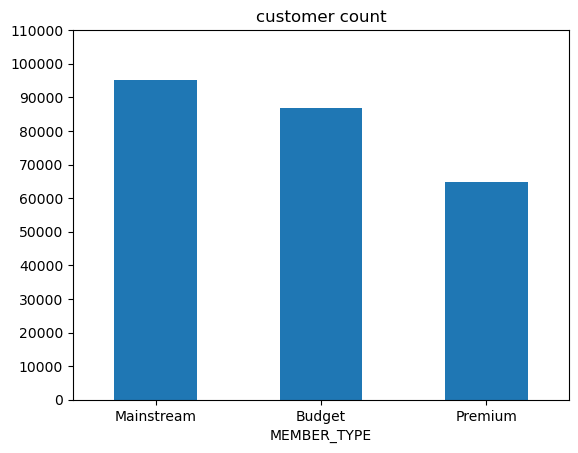

In [36]:
mt_vc = full_df['MEMBER_TYPE'].value_counts()

mt_vc.plot(kind= 'bar')
plt.xticks(rotation= 360)
plt.yticks(np.arange(0,120000, 10000))
plt.title("customer count")
plt.show()

In [37]:
full_df[full_df.duplicated() == True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand,LIFESTAGE,MEMBER_TYPE
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175g,Smiths,OLDER SINGLES/COUPLES,Premium


In [38]:
full_df[full_df['LYLTY_CARD_NBR'] == 107024]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand,LIFESTAGE,MEMBER_TYPE
116275,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175g,Smiths,OLDER SINGLES/COUPLES,Premium
116276,2018-10-01,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6,190g,Cheetos,OLDER SINGLES/COUPLES,Premium
116277,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175g,Smiths,OLDER SINGLES/COUPLES,Premium
116278,2018-10-29,107,107024,108463,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150g,RRD,OLDER SINGLES/COUPLES,Premium
116279,2018-12-09,107,107024,108464,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150g,Smiths,OLDER SINGLES/COUPLES,Premium
116280,2019-01-30,107,107024,108466,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380g,Smiths,OLDER SINGLES/COUPLES,Premium
116281,2019-03-17,107,107024,108467,40,Thins Chips Seasonedchicken 175g,2,6.6,175g,Thins,OLDER SINGLES/COUPLES,Premium
116282,2019-04-22,107,107024,108468,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175g,Smiths,OLDER SINGLES/COUPLES,Premium


In [39]:
full_df['MEMBER_TYPE'].value_counts()

MEMBER_TYPE
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

In [40]:
#creating the dataset of just unique member numbers and counting the unique members by MEMBER type
unique_members = full_df.drop_duplicates(subset = 'LYLTY_CARD_NBR')
unique_members['MEMBER_TYPE'].value_counts()

MEMBER_TYPE
Mainstream    28734
Budget        24006
Premium       18547
Name: count, dtype: int64

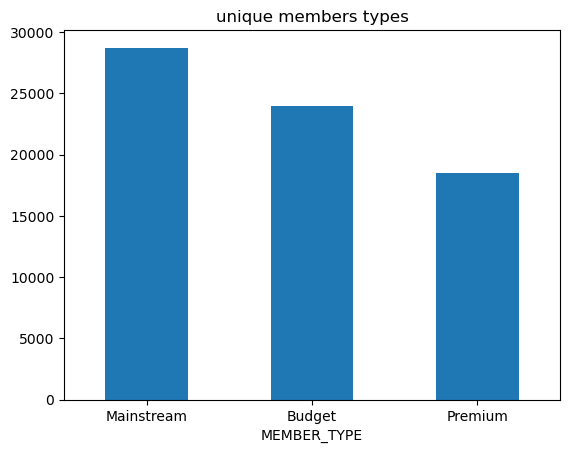

In [41]:
um_vc = unique_members['MEMBER_TYPE'].value_counts()

um_vc.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('unique members types')
plt.show()

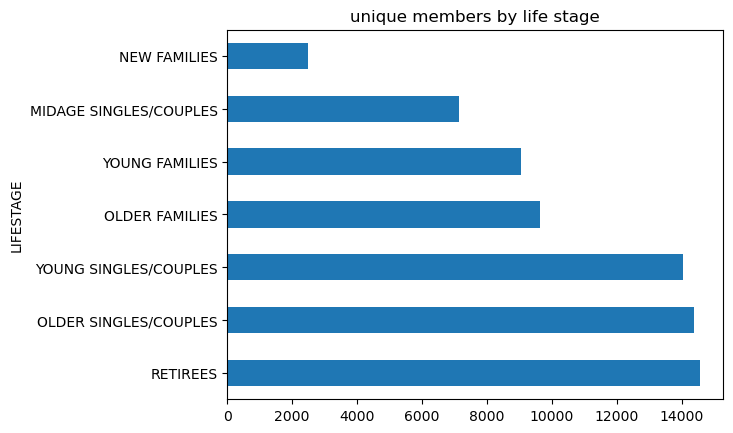

In [42]:
um_ls = unique_members['LIFESTAGE'].value_counts()

um_ls.plot(kind='barh')
plt.title('unique members by life stage')
plt.show()

In [43]:
# grouping by brand
df_br= full_df.groupby('Brand')

In [44]:
# totaling the sales of each brand
chip_sales_brand= df_br['TOT_SALES'].sum()

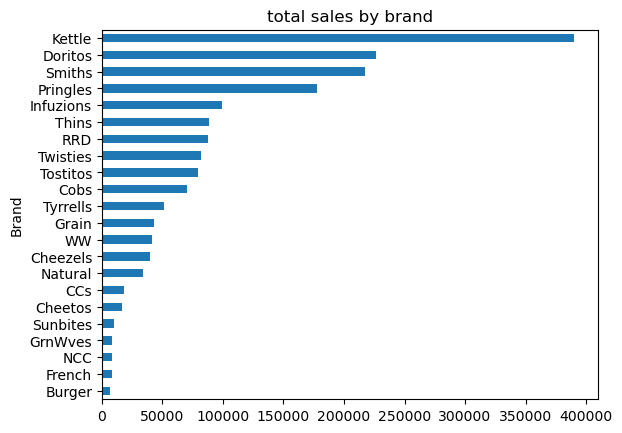

In [45]:
chip_sales_brand.sort_values().plot(kind ='barh')
plt.title('total sales by brand')
plt.show()

In [46]:
# grouping by loyaly card number
cust_gp= full_df.groupby('LYLTY_CARD_NBR')

In [47]:
# sum of total sales of each customer
cust_total = cust_gp['TOT_SALES'].sum()

In [56]:
sorted= cust_total.sort_values()
sorted.tail(10).index

Index([23192, 5168, 95048, 3153, 199157, 179228, 162039, 63197, 58361, 230078], dtype='int64', name='LYLTY_CARD_NBR')

Text(0.5, 1.0, 'top 10 customers by purchases')

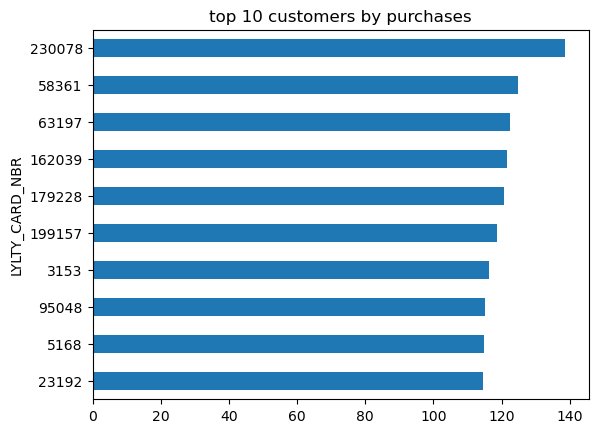

In [57]:
#plotting the top 10 customers by purchases
sorted.tail(10).plot(kind='barh')

plt.title('top 10 customers by purchases')

In [78]:
# list of top ten customers
top_ten = [23192, 5168, 95048, 3153, 199157, 179228, 162039, 63197, 58361, 230078]

# transaction df of top ten customers
top_ten_members= full_df[full_df['LYLTY_CARD_NBR'].isin(top_ten)]

# grouping the transactions by loyality number
top_ten_grouped= top_ten_members.groupby('LYLTY_CARD_NBR')

#filtering the lifestage of customers and num of times they made transactions
top_ten_grouped['LIFESTAGE'].value_counts()

LYLTY_CARD_NBR  LIFESTAGE             
3153            MIDAGE SINGLES/COUPLES    13
5168            OLDER FAMILIES            14
23192           OLDER FAMILIES            16
58361           YOUNG FAMILIES            14
63197           OLDER FAMILIES            14
95048           YOUNG SINGLES/COUPLES     13
162039          OLDER FAMILIES            17
179228          YOUNG FAMILIES            16
199157          YOUNG FAMILIES            13
230078          OLDER FAMILIES            17
Name: count, dtype: int64

In [81]:
# member type of top ten customers
top_ten_grouped['MEMBER_TYPE'].value_counts()

LYLTY_CARD_NBR  MEMBER_TYPE
3153            Premium        13
5168            Mainstream     14
23192           Budget         16
58361           Budget         14
63197           Budget         14
95048           Mainstream     13
162039          Mainstream     17
179228          Budget         16
199157          Premium        13
230078          Budget         17
Name: count, dtype: int64

# Data analysis on customer segments
# 1. Who spends the most on chips i.e. describing customers by lifestage and premimum category?


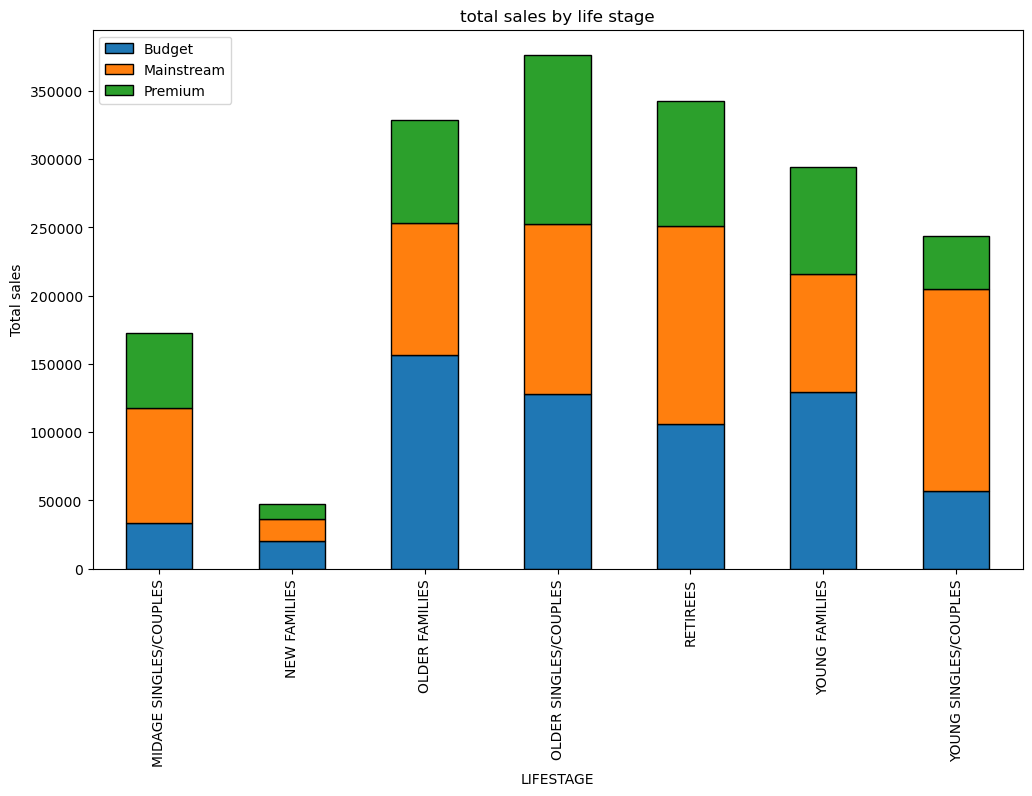

In [118]:
# grouping by life stage and member type
df_gp= pd.DataFrame(full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE']).TOT_SALES.sum())

df_gp.unstack().plot(kind= 'bar', stacked=True, figsize= (12,7), edgecolor='Black')

plt.title('total sales by life stage')
plt.ylabel('Total sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc =2)

### The sales are high for :
### Budget-Older Families, 
### Mainstream - retirees,
### Mainstream - Young singles/couples
### Premium - Older Single/Couples

# 2. How many customers are there in each segment?

In [107]:
df_seg =pd.DataFrame(full_df.groupby(['MEMBER_TYPE','LIFESTAGE']).LYLTY_CARD_NBR.nunique())
df_seg.rename(columns={'LYLTY_CARD_NBR':' num of customers'}, inplace =True)

In [108]:
df_seg

num of customers
MEMBER_TYPE LIFESTAGE                               
Budget      MIDAGE SINGLES/COUPLES              1474
            NEW FAMILIES                        1087
            OLDER FAMILIES                      4611
            OLDER SINGLES/COUPLES               4849
            RETIREES                            4385
            YOUNG FAMILIES                      3953
            YOUNG SINGLES/COUPLES               3647
Mainstream  MIDAGE SINGLES/COUPLES              3298
            NEW FAMILIES                         830
            OLDER FAMILIES                      2788
            OLDER SINGLES/COUPLES               4858
            RETIREES                            6358
            YOUNG FAMILIES                      2685
            YOUNG SINGLES/COUPLES               7917
Premium     MIDAGE SINGLES/COUPLES              2369
            NEW FAMILIES                         575
            OLDER FAMILIES                      2231
            OLDER SINGLES/COUPLES               4682
            RETIREES                            3812
            YOUNG FAMILIES                      2398
            YOUNG SINGLES/COUPLES               2480

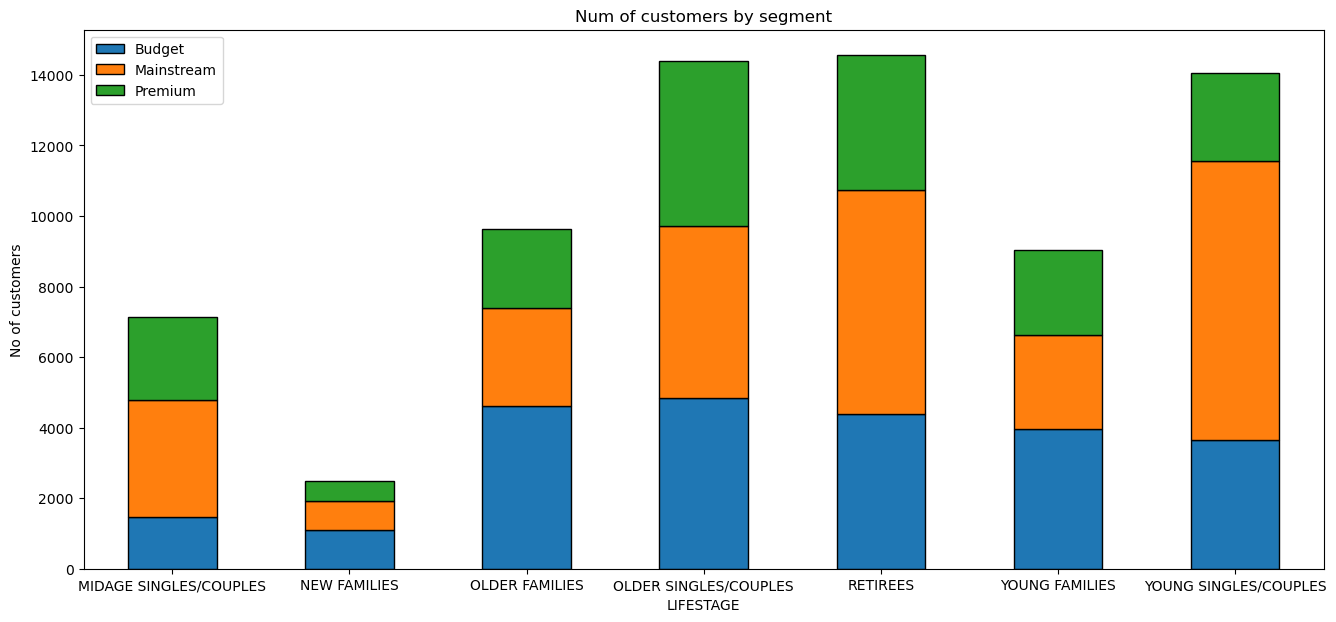

In [121]:
df_seg2 =pd.DataFrame(full_df.groupby(['LIFESTAGE','MEMBER_TYPE']).LYLTY_CARD_NBR.nunique())
df_seg2.unstack().plot(kind='bar', stacked= True, rot= 0, figsize= (16,7), title= 'Num of customers by segment',edgecolor="Black")
plt.ylabel('No of customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc= 2)



# There are more mainstream young singles/couples and retirees. This contributes to more chips sales in these segments however this is not the major driver for the older families segment.

# 3. How many chips are bought per customer by segment?

In [133]:
# avra num of units bought by per customer according to MEMBER_TYPE and LIFSTAGE
df = full_df.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum()/ full_df.groupby(['MEMBER_TYPE','LIFESTAGE']).LYLTY_CARD_NBR.nunique()

df =pd.DataFrame(df, columns= ['Average units per customer'])                     

In [134]:
df.sort_values(by ='Average units per customer', ascending = False)

,,Average units per customer
MEMBER_TYPE,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013
Mainstream,YOUNG FAMILIES,8.638361
Budget,OLDER SINGLES/COUPLES,6.781398
Premium,OLDER SINGLES/COUPLES,6.769543
Mainstream,OLDER SINGLES/COUPLES,6.712021


## we can see that Mainstream OLDER FAMILIES segment bought highest product per customer 
## and Budget	YOUNG SINGLES/COUPLES segment bought least

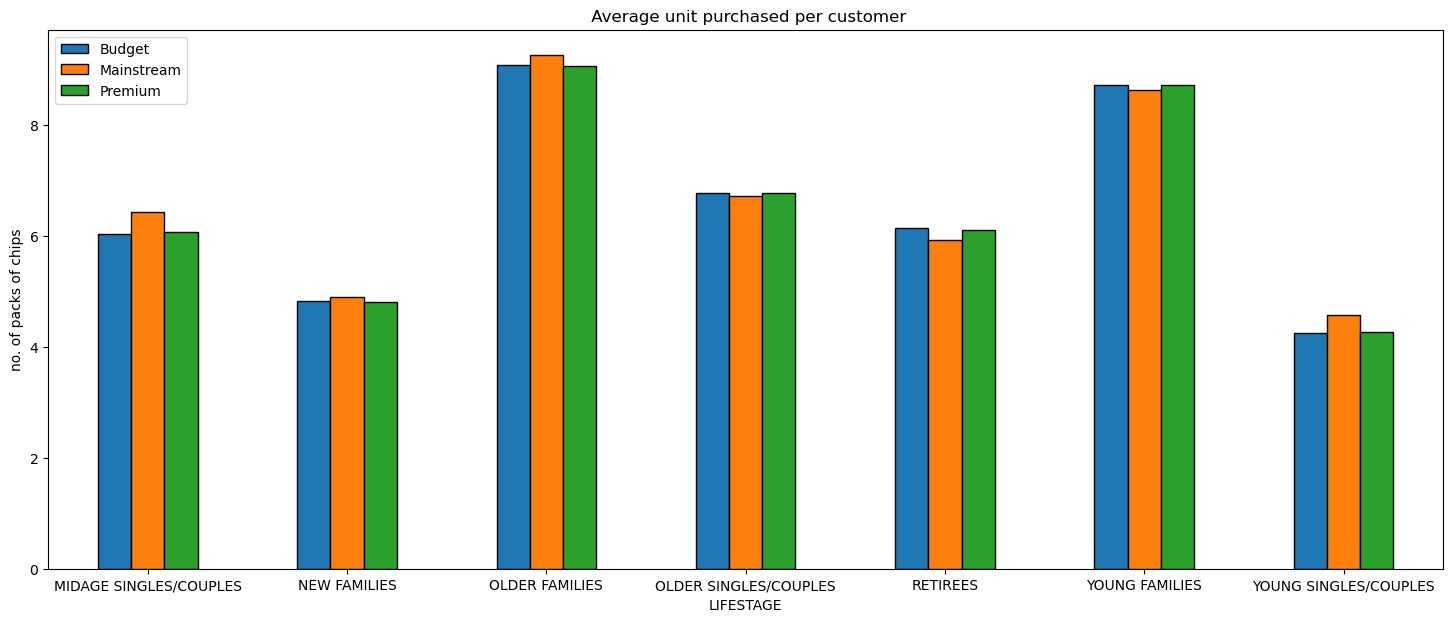

In [161]:
df2= pd.DataFrame(full_df.groupby(['LIFESTAGE','MEMBER_TYPE']).PROD_QTY.sum()/ full_df.groupby(['LIFESTAGE','MEMBER_TYPE']).LYLTY_CARD_NBR.nunique())
df2.unstack().plot(kind ='bar', rot =0, figsize=(18,7), title=' Average unit purchased per customer', edgecolor='Black')

plt.ylabel('no. of packs of chips')
plt.legend(['Budget','Mainstream','Premium'], loc =2)

 for all three life stages the Older Families and Young Families has highest unit purchased per customer

# 4. What's the average chip price by customer segment?

In [164]:
# Average price per unit by MEMBER_TYPE and LIFESTAGE

df4 = full_df.groupby(['MEMBER_TYPE', 'LIFESTAGE']).TOT_SALES.sum() / full_df.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum()
df4 = pd.DataFrame(df4, columns = ['Price per Unit'])

In [167]:
df4.sort_values('Price per Unit', ascending = False)

Price per Unit
MEMBER_TYPE LIFESTAGE                             
Mainstream  YOUNG SINGLES/COUPLES         4.074043
            MIDAGE SINGLES/COUPLES        3.994449
            NEW FAMILIES                  3.935887
Budget      RETIREES                      3.932731
            NEW FAMILIES                  3.931969
Premium     RETIREES                      3.924037
            OLDER SINGLES/COUPLES         3.897698
Budget      OLDER SINGLES/COUPLES         3.887529
Premium     NEW FAMILIES                  3.886168
Mainstream  RETIREES                      3.852986
            OLDER SINGLES/COUPLES         3.822753
Premium     MIDAGE SINGLES/COUPLES        3.780823
Budget      YOUNG FAMILIES                3.761903
Premium     YOUNG FAMILIES                3.759232
Budget      MIDAGE SINGLES/COUPLES        3.753878
            OLDER FAMILIES                3.747969
Mainstream  OLDER FAMILIES                3.736380
            YOUNG FAMILIES                3.722439
Premium     OLDER FAMILIES                3.717703
            YOUNG SINGLES/COUPLES         3.692889
Budget      YOUNG SINGLES/COUPLES         3.685297

### Mainstream midage singles/couples and young singles/couples pay more per packet of chips compared to other segments.

# Let us further explore and target the segment Mainstream and young singles/couples that contributes most to the sales.
### Let's find out if they tend to buy a particular brand of chips.

In [168]:
full_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,Brand,LIFESTAGE,MEMBER_TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


In [169]:
dfa= full_df[(full_df['LIFESTAGE']== 'YOUNG SINGLES/COUPLES') & (full_df['MEMBER_TYPE']== 'Mainstream')]
dfb= full_df[(full_df['LIFESTAGE']!= 'YOUNG SINGLES/COUPLES') & (full_df['MEMBER_TYPE']!= 'Mainstream')]

In [171]:
dfa_quantity = dfa['PROD_QTY'].sum()
dfa_quantity

36225

In [172]:
dfb_quantity = dfb['PROD_QTY'].sum()
dfb_quantity

263544

In [174]:
dfa_quantity_brand = dfa.groupby('Brand')['PROD_QTY'].sum()
dfa_quantity_brand

Brand
Burger        106
CCs           405
Cheetos       291
Cheezels      651
Cobs         1617
Doritos      4447
French        143
Grain        1055
GrnWves       130
Infuzions    2343
Kettle       7172
NCC           132
Natural       578
Pringles     4326
RRD          1587
Smiths       3491
Sunbites      230
Thins        2187
Tostitos     1645
Twisties     1673
Tyrrells     1143
WW            873
Name: PROD_QTY, dtype: int64

In [175]:
dfb_quantity_brand = dfb.groupby('Brand')['PROD_QTY'].sum()
dfb_quantity_brand

Brand
Burger        1723
CCs           4861
Cheetos       3099
Cheezels      4982
Cobs         10133
Doritos      26663
French        1504
Grain         6560
GrnWves       1628
Infuzions    15130
Kettle       43896
NCC           1597
Natural       6562
Pringles     26647
RRD          17706
Smiths       32737
Sunbites      3324
Thins        15064
Tostitos     10107
Twisties      9997
Tyrrells      6777
WW           12847
Name: PROD_QTY, dtype: int64

In [176]:
# To check the brand affinity

dfa_affinity = dfa_quantity_brand/dfa_quantity
dfb_affinity = dfb_quantity_brand/dfb_quantity

affinity = (dfa_affinity/dfb_affinity).sort_values(ascending = False)

df_affinity= pd.DataFrame({'Brand Name':affinity.index, 'Affinity':affinity.values})
df_affinity

,Brand Name,Affinity
0,Tyrrells,1.227025
1,Twisties,1.217506
2,Doritos,1.213397
3,Kettle,1.188667
4,Tostitos,1.184100
5,Pringles,1.181090
6,Grain,1.170020
7,Cobs,1.160959
8,Infuzions,1.126622
9,Thins,1.056217


##### Tyrell chips seems to be the most popular brand for Mainstream young singles/couples almost 23% more than the rest of the audience
##### whereas Burger were purchased less than 56% less as compared to rest of the people.

# Let’s also find out if our target segment tends to buy larger packs of chips.

In [178]:
dfa_quantity_pack= dfa.groupby('weight')['PROD_QTY'].sum()
dfb_quantity_pack= dfb.groupby('weight')['PROD_QTY'].sum()

In [182]:
# To Check Pack Affinity
dfa_affinity = dfa_quantity_pack/dfa_quantity
dfb_affinity = dfb_quantity_pack/dfb_quantity

affinity_pack = (dfa_affinity/dfb_affinity).sort_values(ascending =False)

df_affinity_pack = pd.DataFrame({'Pack Size':affinity_pack.index, 'Affinity':affinity_pack.values})
df_affinity_pack

,Pack Size,Affinity
0,270g,1.269608
1,380g,1.250827
2,330g,1.202243
3,110g,1.186492
4,134g,1.181090
5,210g,1.170020
6,135g,1.142086
7,250g,1.115959
8,170g,1.005300
9,150g,0.966449


In [185]:
Product_name = full_df[(full_df['weight'] == '270g')]['PROD_NAME']
                   
Product_name.unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Mainstream young singles/couples are 27% more likely to purchase a 270g pack of Twisties Cheese chips which reflects the higher volume of sales.

In [186]:
Product_name = full_df[(full_df['weight'] == '220g')]['PROD_NAME']
                   
Product_name.unique()

array(['Burger Rings 220g'], dtype=object)

Mainstream young singles/couples are 56% less likely to purchase a 220g pack of Burger Rings which reflects the lower volume of sales.

# Conclusion
### Most of the people purchase chips of these brands Kettle, Smiths, Doritos, Pringles and RRD respectively as compared to other brands.
### Budget – older families, Mainstream – young singles/couples, and Mainstream – retirees shoppers have accounted for the majority of sales.
### Mainstream young singles/couples and retirees spend more money on chips than other purchasers mainly due to the fact that there are more customers in these segments.
### Additionally, young, middle-aged, and mainstream individuals and couples are more inclined to pay more for each bag of chips.
### They are also 23% more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population.